<hr>
<p style="text-align:left;">
    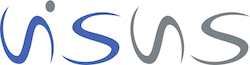
    <span style="float:right;">
        University of Stuttgart<br />Visualization Research Center
    </span>
</p>
<hr>
<p style="text-align:left;">
    <span style="float:left;">
        Prof. Daniel Weiskopf
    </span>
    <span style="float:right;">
        Sunday, 2024-11-24
    </span>
</p>
<br/>

# Theoretical and Methodological Foundations of Visual Computing
## Assignment 06
Responsible tutor: Daniel Klötzl
<br/>

> *Please submit your solution to ILIAS by <b>Sunday, 2024-12-01, 23:55</b>. <br /> Solutions will be discussed in the tutorial on <b>Thursday, 2024-12-05</b>.* <br /> *Please note that source code will only be accepted if it compiles.*
<hr>

**Student name(s):** <font color='green'>Guangxin Zhao</font> <br />
**Immatriculation number(s):** <font color='green'>st194136</font> <br />

<hr>

### Exercise 6.1 (3 points)
The second-order differential equation describing the motion of a frictionless pendulum is 
\begin{equation}
\ddot{\varphi} = -\frac{g}{l}\sin(\varphi).
\end{equation}
Here, $\varphi$ is the deflection angle of the pendulum, $l=1\,\text{m}$ is its length and $g=9.81\,\text{m}/\text{s}^2$ the gravitational constant of earth.

`(a)` Reformulate this equation as a set of first-order differential equations.

**Answer:**

Let $\omega=\dot\varphi$, we can then reformulate the equation as a set of first-order differential equations:

\begin{align*}
	\dot\varphi &= \omega, \\
	\dot\omega &= -\frac{g}{l}\sin(\varphi).
\end{align*}

`(b)` Implement the *explicit Euler method* in Python to numerically solve this ODE system. Assume a time step of $\Delta t = 0.01\,\text{s}$, an initial deflection angle $\varphi_0 = 0$, and an initial angular speed $\omega_0 = \dot{\varphi}_0 = 1\,\text{s}^{-1}$.
Update the following Python snippet and implement the Euler method in `make_step_euler(...)`.

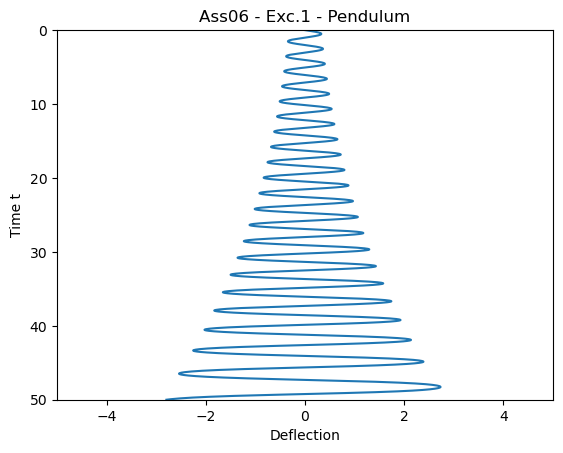

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
g = 9.81   # gravity
dt = 0.01  # time step
max_steps = int(50 / dt)  # number of time steps
l = 1  # length of pendulum

# Initial values
omega0 = 1
phi0 = 0

phi_euler = phi0
omega_euler = omega0
t = 0.0

# Vectors for plot
y_euler = np.zeros(max_steps + 1)
tA = np.zeros(max_steps + 1)

# Set initial values
y_euler[0] = phi0

# Function to compute explicit Euler step
def make_step_euler(phi, omega, dt, g, l):
	# Compute new values
	dphi_dt = omega
	domega_dt = -g / l * np.sin(phi)

	phi += dt * dphi_dt
	omega += dt * domega_dt

	return phi, omega

# Main loop
for m in range(max_steps):
	phi_euler, omega_euler = make_step_euler(phi_euler, omega_euler, dt, g, l)
	# Advance t
	t += dt

	y_euler[m + 1] = phi_euler
	tA[m + 1] = t

# Plot
plt.figure()
plt.plot(y_euler, tA)

plt.axis([-5, 5, 0, 50])
plt.gca().invert_yaxis()
plt.title('Ass06 - Exc.1 - Pendulum')
plt.xlabel('Deflection')
plt.ylabel('Time t')
plt.show()

<hr>

### Exercise 6.2 (8 points)

Given is the time-dependent two-dimensional real-valued vector field
\begin{equation}
    \vec{v}(\vec{x},t) =  \begin{pmatrix} v_x(t) \\ v_y(t) \end{pmatrix} = \begin{pmatrix} \frac{x}{1+t} + sin(t) \\ cos(t) \end{pmatrix} \quad \forall t \in \mathbb{R}\backslash  \{-1\}, \, \vec{x}=(x,y)\in \mathbb{R}^2.
\end{equation}

`(a)` Describe the concept of a stream-, path-, and streakline in your own words (one sentence each).

**Answer:**

- The streamline is the moving direction of the fluid at a specific point.

- The pathline is the actual path of the particle.

- The streakline is the history of a particle that has passed through a specific point in the past.

`(b)` Draw the stream-, path-, and streakline using Python, depending on the starting point $(x_0, y_0) = (-1,-1) \in \mathbb{R}^2$ at $t_0 = \frac{3}{2}\pi$ into a $x-y-t$ diagram at $t_0+\Delta t$ with $\Delta t\in\{0.5\pi,\exp(1),\,\pi,\,1.5\pi,\,2\pi,\, 4\pi \}$ and $(x,y) \in [-5,5]^2$.
- For the streamline integration, use a step size of $\Delta s = 0.001$.
- For the time integration, use a step size of $\Delta t = 0.001$.

> Hint: Do not use existing functions for the computation of stream-, path-, and streaklines. Instead, implement separate functions for stream-, path-, and streaklines and solve the respective ODEs via the explicit Euler method. Double-check your results with the example from the lecture for $t\in[0,100]$ and the vector field $\vec{v}(\vec{x}, t):= \big(\frac{x}{1+t}, \frac{y}{1+2t} \big)$ with $(x_0, y_0) = (0.1,0.5) \in \mathbb{R}^2$.

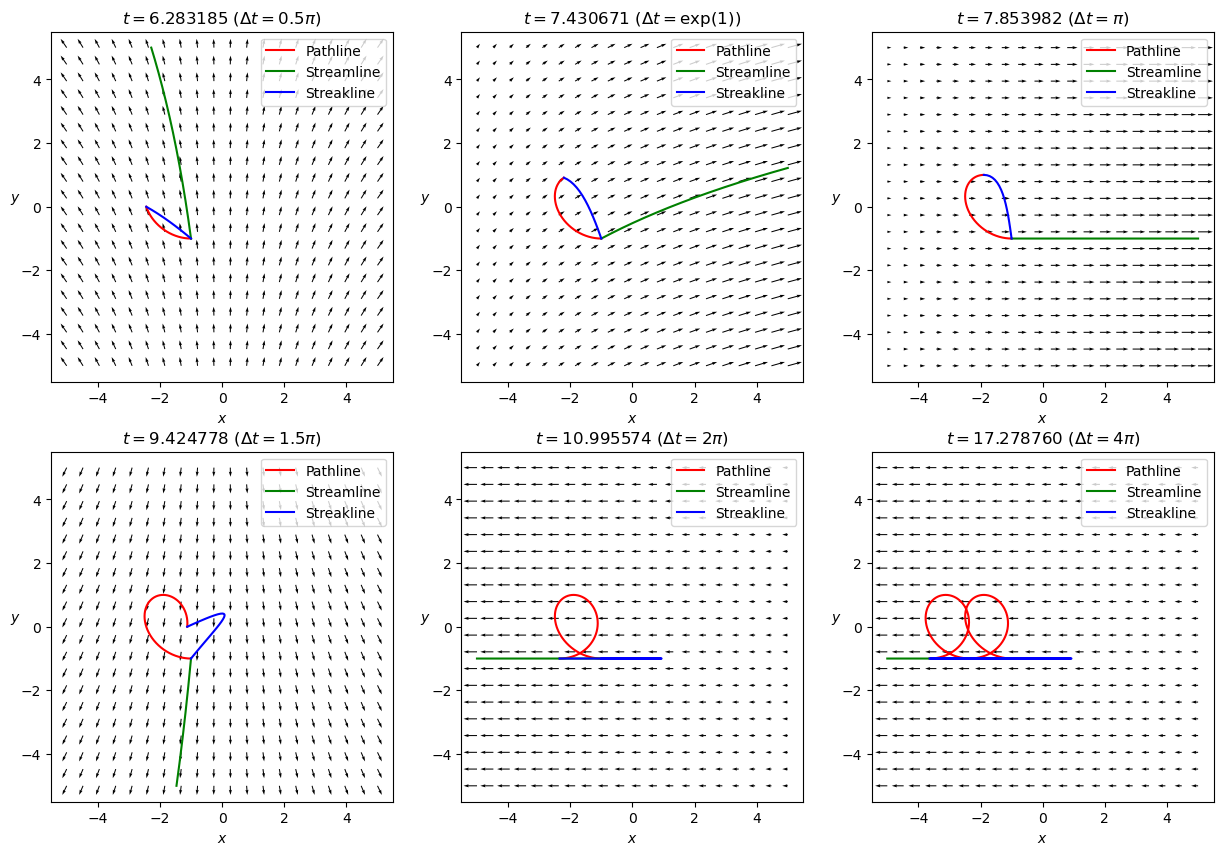

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables
x_0 = -1
y_0 = -1
t_0 = 3 / 2 * np.pi
dt = 0.001
ds = 0.001

delta_ts = [0.5 * np.pi, np.exp(1), np.pi, 1.5 * np.pi, 2 * np.pi, 4 * np.pi]
delta_t_strs = ['0.5\pi', '\exp(1)', '\pi', '1.5\pi', '2\pi', '4\pi']

# Define the velocity field
def velocity_field(x, y, t):
	vector_x = x / (1 + t) + np.sin(t)
	vector_y = np.cos(t)
	return vector_x, vector_y

# Compute the streamline
def streamline(t=t_0):
	x, y = x_0, y_0
	stream_x, stream_y = [x], [y]

	while x < 5 and y < 5 and x > -5 and y > -5:
		v_x, v_y = velocity_field(x, y, t)
		x += v_x * ds
		y += v_y * ds

		stream_x.append(x)
		stream_y.append(y)

	return stream_x, stream_y

# Compute the pathline
def pathline(max_time, t=t_0):
	x, y = x_0, y_0
	path_x, path_y = [x], [y]

	while t < max_time:
		v_x, v_y = velocity_field(x, y, t)
		x += v_x * dt
		y += v_y * dt
		t += dt

		path_x.append(x)
		path_y.append(y)

	return path_x, path_y

# Compute the streakline
def streakline(max_time):
	streak_x, streak_y = [], []
	t = t_0

	while t < max_time:
		path_x, path_y = pathline(t_0+max_time-t, t)
		streak_x.append(path_x[-1])
		streak_y.append(path_y[-1])
		t += dt * 100

	streak_x.append(path_x[-1])
	streak_y.append(path_y[-1])
	
	return streak_x, streak_y

def plot(n):
	delta_t, delta_t_str = delta_ts[n], delta_t_strs[n]
	
	plt.subplot(2, 3, n+1)
	X, Y = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))
	U, V = velocity_field(X, Y, t_0+delta_t)
	plt.quiver(X, Y, U, V)
	plt.title('$t=%f$ $(\Delta t=%s)$' % (t_0+delta_t, delta_t_str))
	plt.xlabel('$x$')
	plt.ylabel('$y$', rotation=0)

	path_x, path_y = pathline(t_0+delta_t)
	plt.plot(path_x, path_y, 'r', label="Pathline")

	stream_x, stream_y = streamline(t_0+delta_t)
	plt.plot(stream_x, stream_y, 'g', label="Streamline")

	streak_x, streak_y = streakline(t_0+delta_t)
	plt.plot(streak_x, streak_y, 'b', label="Streakline")

	plt.legend()

plt.figure(figsize=(15, 10))

for n in range(len(delta_ts)):
	plot(n)

plt.show()

<hr>

### Exercise 6.3 (3 points)

For which values of $a$ is the partial differential equation elliptic, parabolic, or hyperbolic? 

`(a)` $a \frac{\partial^2 u}{\partial t^2} + (5-a) \frac{\partial^2 u}{\partial x^2} - \frac{\partial u}{\partial t} = 0.$


**Answer:**

In this senario, we have $A=a$, $B=0$ ,and $C=(5-a)$.

The discriminant is $\Delta=AC-B^2=a(5-a)$.

- If $\Delta>0$, the equation is elliptic.
- If $\Delta=0$, the equation is parabolic.
- If $\Delta<0$, the equation is hyperbolic.

Therefore, the equation is elliptic when $a\in(0,5)$, parabolic when $a=0$ or $a=5$, and hyperbolic when $a\in(-\infty,0)\cup(5,\infty)$.

`(b)` $a \frac{\partial^2 u}{\partial t^2} + 4 \frac{\partial^2 u}{\partial t \partial x} + (5-a) \frac{\partial^2 u}{\partial x^2} = 0.$

**Answer:**

In this senario, we have $A=a$, $B=2$ ,and $C=(5-a)$.

The discriminant is $\Delta=AC-B^2=a(5-a)-4$.

- If $\Delta>0$, the equation is elliptic.
- If $\Delta=0$, the equation is parabolic.
- If $\Delta<0$, the equation is hyperbolic.

Therefore, the equation is elliptic when $a\in(1,4)$, parabolic when $a=1$ or $a=4$, and hyperbolic when $a\in(-\infty,1)\cup(4,\infty)$.

<hr>

### Exercise 6.4 (6 points)

Consider the 1D partial differential equation (heat equation) with the parameter $k \in \mathbb{R}$:
\begin{equation}
    \frac{\partial u}{\partial t} = k^2 \frac{\partial^2 u}{\partial x^2}. 
\end{equation}

`(a)` Show that if $v_1(x,t)$ and $v_2(x,t)$ are solutions of the partial differential equation (ignoring any boundary conditions), then the function $v(x,t) = c_1 v_1(x,t) + c_2 v_2(x,t)$ for coefficients $c_1,c_2 \in \mathbb{R}$ solves the partial differential equation as well.


**Answer:**

We can first compute the first partial derivative of $v(x,t)$:

\begin{align*}
	\frac{\partial v}{\partial t} &= c_1 \frac{\partial v_1}{\partial t} + c_2 \frac{\partial v_2}{\partial t}, \\
	\frac{\partial v}{\partial x} &= c_1 \frac{\partial v_1}{\partial x} + c_2 \frac{\partial v_2}{\partial x}.
\end{align*}

Then the second partial derivative of $v(x,t)$ is given by:

\begin{align*}
	\frac{\partial^2 v}{\partial x^2} &= c_1 \frac{\partial^2 v_1}{\partial x^2} + c_2 \frac{\partial^2 v_2}{\partial x^2}.
\end{align*}

Since $v_1(x,t)$ and $v_2(x,t)$ are solutions of the partial differential equation, we have:

\begin{align*}
	\frac{\partial v_1}{\partial t} &= k^2 \frac{\partial^2 v_1}{\partial x^2}, \\
	\frac{\partial v_2}{\partial t} &= k^2 \frac{\partial^2 v_2}{\partial x^2}.
\end{align*}

Therefore, we can get:

\begin{align*}
	\frac{\partial v}{\partial t} 
		&= c_1 k^2 \frac{\partial^2 v_1}{\partial x^2} + c_2 k^2 \frac{\partial^2 v_2}{\partial x^2} \\
		&= k^2 \left(c_1 \frac{\partial^2 v_1}{\partial x^2} + c_2 \frac{\partial^2 v_2}{\partial x^2}\right) \\
		&= k^2 \frac{\partial^2 v}{\partial x^2}.
\end{align*}

`(b)`Consider the domain $x \in [0,L]$ with $L >0$ and $t>0$ as well as the initial condition 
\begin{equation}
u(x,0) = -20 \sin\left(x \cdot \frac{\pi}{L}\right)+ 20 + \frac{40-20}{L} x \qquad \text{ for } x \in [0,L]
\end{equation} 
and boundary condition
\begin{equation}
u(0,t) = 20, \quad u(L,t) = 40 \qquad \text{ for } t>0.
\end{equation}
We know from the lecture that separation of variables leads to a general solution that consists of summands of the form
\begin{equation}
v(x,t) = c e^{- \omega^2 k^2 t} \sin(\omega x),
\end{equation}
where $c, \omega \in \mathbb{R}$ are parameters. With this and with the help of a), verify that
\begin{equation}
u(x,t) = -20e^{- \left(\frac{\pi}{L}\right)^2 k^2 t} \sin\left(x \cdot \frac{\pi}{L}\right) + 20 + \frac{40-20}{L} x
\end{equation}
is a solution for the partial differential equation that satisfies the initial condition and the boundary condition.

**Answer:**

We can first compute the first partial derivative of $u(x,t)$:

\begin{align*}
	\frac{\partial u}{\partial t} &= 20\left(\frac{\pi}{L}\right)^2 k^2 e^{- \left(\frac{\pi}{L}\right)^2 k^2 t} \sin\left(x \cdot \frac{\pi}{L}\right), \\
	\frac{\partial u}{\partial x} &= -20\left(\frac{\pi}{L}\right) e^{- \left(\frac{\pi}{L}\right)^2 k^2 t} \cos\left(x \cdot \frac{\pi}{L}\right) + \frac{40-20}{L}.
\end{align*}

Then the second partial derivative of $u(x,t)$ is given by:

\begin{align*}
	\frac{\partial^2 u}{\partial x^2} &= 20\left(\frac{\pi}{L}\right)^2 e^{- \left(\frac{\pi}{L}\right)^2 k^2 t} \sin\left(x \cdot \frac{\pi}{L}\right).
\end{align*}

Take $\frac{\partial u}{\partial t}$ and $\frac{\partial^2 u}{\partial x^2}$ into the partial differential equation, we have:

\begin{align*}
	\frac{\partial u}{\partial t} &= k^2 \frac{\partial^2 u}{\partial x^2}.
\end{align*}

Thus, $u(x,t)$ is a solution for the partial differential equation.

Take $t=0$ into $u(x,t)$, we have:

\begin{align*}
	u(x,0) &= -20 \sin\left(x \cdot \frac{\pi}{L}\right)+ 20 + \frac{40-20}{L} x,
\end{align*}

which satisfies the initial condition.

Calculate $u(0,t)$ and $u(L,t)$, we have:

\begin{align*}
	u(0,t) &= -20e^{- \left(\frac{\pi}{L}\right)^2 k^2 t} \sin\left(0 \cdot \frac{\pi}{L}\right) + 20 + \frac{40-20}{L} \cdot 0 = 20, \\
	u(L,t) &= -20e^{- \left(\frac{\pi}{L}\right)^2 k^2 t} \sin\left(L \cdot \frac{\pi}{L}\right) + 20 + \frac{40-20}{L} L = 40.
\end{align*}

Therefore, the boundary condition is satisfied.

`(c)` Relate the above 1D partial differential equation to a physical phenomenon: Having in mind that the equation characterizes evolution of temperature (or in general diffusion), describe a concrete scenario and take into account the values/parameters $u(x,t)$, $x$, $t$, $L$, and $k$ as well as the initial and boundary condition from b). 
Elaborate on the ``stability`` of the solution, i.e., determine and explain $\lim_{t \rightarrow \infty} u(x,t) = u_\infty(x)$. You can also use simple sketches/visualizations with annotations (done by hand or via Python).

Suppose we have a rod whose length ($L$) is $1\,\text{m}$, which is made of a material with a thermal diffusivity of $k=0.1\,\text{m}^2/\text{s}$. It has the following properties:

- **Initial condition:** The initial temperature distribution of the rod is given by $u(x,0) = -20\sin(\pi x) + 20 + 20x$. 
- **Boundary condition:** One end of the rod ($x=0$) is heated to $20\,\degree\text{C}$ and the other end ($x=L$) is heated to $40\,\degree\text{C}$. 
- **One solution to the problem:** The temperature distribution of the rod at time $t$ is given by $u(x,t) = -20e^{-\pi^2 t}\sin(\pi x) + 20 + 20x$. 

The temperature distribution of the rod will eventually reach a steady state, which is given by:

\begin{align*}
	u_\infty(x) &= \lim_{t \rightarrow \infty} u(x,t) \\
	&= -20e^{-\pi^2 t}\sin(\pi x) + 20 + 20x \\
	&= 20+20x.
\end{align*}

The steady state temperature distribution of the rod is a linear function of $x$, which means that the temperature of the rod will increase linearly from $20\,\degree\text{C}$ to $40\,\degree\text{C}$ along the rod.

The Python code below visualizes the temperature distribution of the rod at different times (along with the steady state).

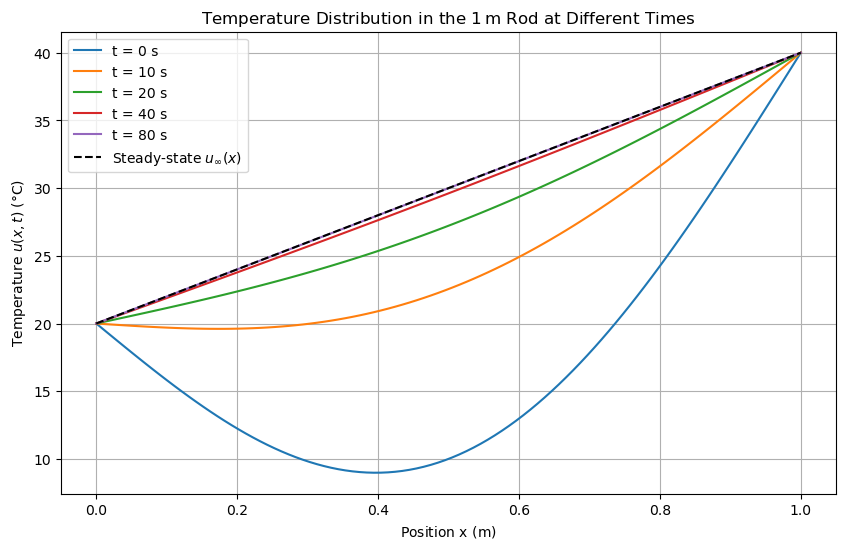

In [40]:
import numpy as np
import matplotlib.pyplot as plt

L = 1  # Length of the rod (m)
k = 0.1  # Thermal diffusivity (m^2/s)
x = np.linspace(0, L, 100)
times = [0, 10, 20, 40, 80]

# Heat diffusion equation
def u(x, t):
    return -20 * np.exp(-(np.pi / L)**2 * k**2 * t) * np.sin(np.pi * x / L) + 20 + (40 - 20) / L * x

# Steady-state solution
def u_inf(x):
	return 20 + 20 * x

plt.figure(figsize=(10, 6))
for t in times:
    plt.plot(x, u(x, t), label=f"t = {t} s")

plt.plot(x, u_inf(x), 'k--', label="Steady-state $u_\infty(x)$")
plt.title("Temperature Distribution in the $1\,\\text{m}$ Rod at Different Times")
plt.xlabel("Position x ($\\text{m}$)")
plt.ylabel("Temperature $u(x,t)$ ($\degree\\text{C}$)")
plt.legend()
plt.grid()
plt.show()

<hr>

<div class="alert alert-success">

### Guidelines for Submission

Do not forget to update the student name(s) and matriculation number(s). 

**Text-based Responses**

For text-based questions, a markdown cell with the placeholder `Cell left blank for student response` will usually follow the question. Ensure that text responses are either entered in markdown cells using plain text and LaTeX or via the import of PDFs or PNG files (e.g. via `![ExampleFileName](example_file.png)` for handwritten solutions). If external files are used in your Jupyter Notebook, make sure to include all data in a zipped folder uploaded to Ilias.

**Code-based Responses**

For questions that involve Python coding, you'll typically find a code cell with the placeholder `# YOUR CODE HERE`.

#### Submission Process

To ensure your notebook runs smoothly from start to finish, select "Restart & Run All" from the "Kernel" menu before submitting.

When ready to submit, upload your `.ipynb` file (or a zipped folder containing the `.ipynb` file as well as all auxiliary files, e.g. imported .pdf or .jpg files) to Ilias.

</div>